In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

plt.xkcd()  # komixovy vzhled <-- xkcd je nejaky znamy komix

### Nacteni dat

In [130]:
df = pd.read_csv('./data.csv')
df['celkem'] = df['zeny'] + df["muzi"]
df['celkem_volici'] = df['zeny_volici'] + df['muzi_volici']
df['delka_studia'] = [4 if len(t) == 2 else 8 for t in df['trida']]
df.head()

trida  rocnik  muzi  zeny  muzi_volici  zeny_volici   TR    M   CJ Aj-1  \
0   5A8       1    14    17            6            3  Kom  Spa  Kom  Sol   
1   5B8       1    16    17           14            5   MH  Sle  Lan  Sol   
2   6A8       2    13    19            7           13  Spa  Spa   AK   Bi   
3   6B8       2    10    23            8            6  Sle  Sle   AK   SE   
4   7A8       3    19    12           12            8  Pos  Wei   EP   SE   

      ...        Fs   Zs IVTv IVT-1 IVT-2   Eh   Ev celkem celkem_volici  \
0     ...       NaN  NaN  NaN    DR   Hla  Tab  Stu     31             9   
1     ...       NaN  NaN  NaN   Hla    VK  Got  Stu     33            19   
2     ...       NaN  NaN  NaN   NaN   NaN  Tab  Stu     32            20   
3     ...       NaN  NaN  NaN   NaN   NaN  Tab  Stu     33            14   
4     ...       Mal  NaN  NaN   NaN   NaN  NaN  NaN     31            20   

  delka_studia  
0            8  
1            8  
2            8  
3            8  
4            8  

[5 rows x 37 columns]

# Gender Pies

In [131]:
def bake_pie(sizes, labels, title="", save_path=""):
    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')
    ax.set_title(title)

    if save_path:
        plt.savefig(save_path, dpi=300)
    plt.show()

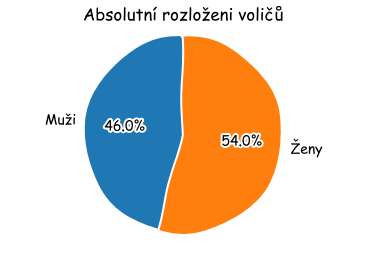

In [132]:
labels_1 = ['Muži', 'Ženy']
sizes_1 = [df['muzi_volici'].sum(), df['zeny_volici'].sum()]
title_1 = "Absolutní rozloženi voličů"
save_path_1 = './images/abs_rozlozeni_volicu.png'

bake_pie(sizes_1, labels_1, title_1, save_path_1)

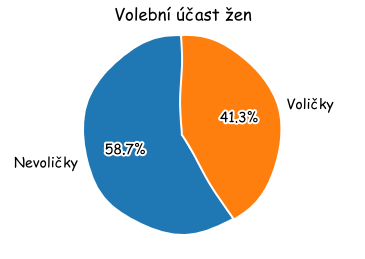

In [133]:
labels_2 = ["Nevoličky", "Voličky"]
sizes_2 = [(df['zeny'] - df['zeny_volici']).sum(), df['zeny_volici'].sum()]
title_2 = 'Volební účast žen'
save_path_2 = './images/volebni_ucast_zen.png'

bake_pie(sizes_2, labels_2, title_2, save_path_2)

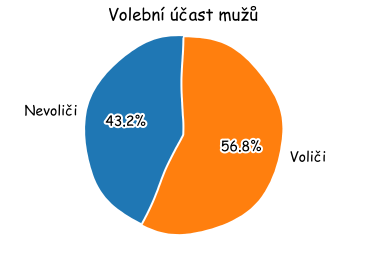

In [134]:
labels_3 = ["Nevoliči", "Voliči"]
sizes_3 = [(df['muzi'] - df['muzi_volici']).sum(), df['muzi_volici'].sum()]
title_3 = 'Volební účast mužů'
save_path_3 = './images/volebni_ucast_muzu.png'

bake_pie(sizes_3, labels_3, title_3, save_path_3)

# Age and education

In [135]:
def make_bars(sizes, labels, title="", xlabel="", yticks_rotation=0, save_path=""):
    fig, ax = plt.subplots(figsize=(12, 5))
    plt.tight_layout()  # mensi bile okraje kolem obrazku

    y_pos = np.arange(len(labels))

    ax.barh(y_pos, sizes)
    ax.set_xlim((0, 100))
    
    if xlabel:
        ax.set_xlabel(xlabel)
    if title:
        ax.set_title(title)

    ax.set_yticks(y_pos)
    ax.set_yticklabels(labels, rotation=yticks_rotation)
    ax.invert_yaxis()  # labels read top-to-bottom


    ax.set_xticks(np.arange(0, 101, 10))
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: "{:.0f} %".format(x)))

#     ax.set_xticks(np.arange(0, 101, 5), minor=True)

#     Pri uzivani plt.xkcd() nelze pridat grid
#     ax.grid(which='both')       
#     ax.grid(which='major', alpha=0.6)
#     ax.grid(which='minor', alpha=0.3, linestyle=':')

    if save_path:
        plt.savefig(save_path, dpi=350)

    plt.show()

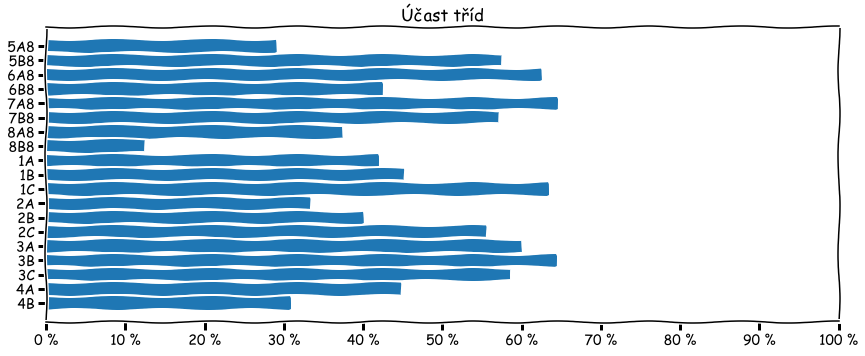

In [136]:
labels_4 = df.trida
sizes_4 = (df.celkem_volici / df.celkem) * 100

make_bars(sizes_4, labels_4, title="Účast tříd", save_path='./images/ucast_trid.png')

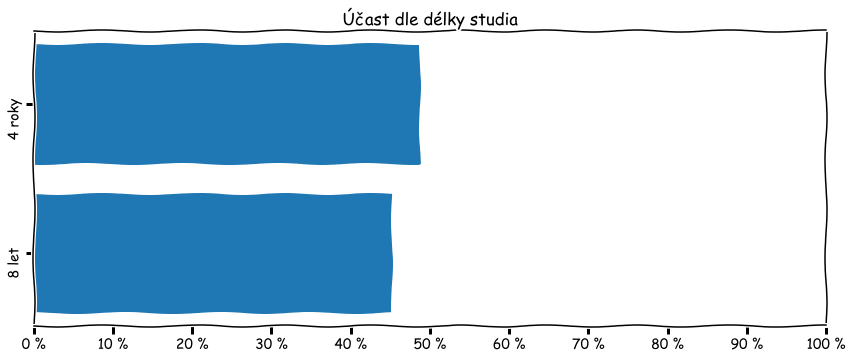

In [137]:
labels_5 = ["4 roky", "8 let"]
sizes_5 = [(df[df['delka_studia'] == 4].celkem_volici.sum() / df[df['delka_studia'] == 4].celkem.sum()) * 100,
         (df[df['delka_studia'] == 8].celkem_volici.sum() / df[df['delka_studia'] == 8].celkem.sum()) * 100]

make_bars(sizes_5, labels_5, yticks_rotation=90, title="Účast dle délky studia", save_path='./images/ucast_dle_delky_studia.png')

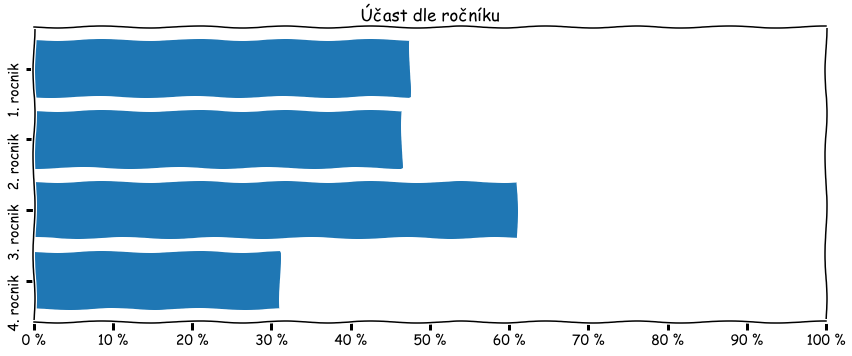

In [138]:
labels_6 = ["{:d}. rocnik".format(r) for r in set(df['rocnik'])]
sizes_6 = [(df[df['rocnik'] == r].celkem_volici.sum() / df[df['rocnik'] == r].celkem.sum()) * 100
         for r in set(df['rocnik'])]

make_bars(sizes_6, labels_6, title="Účast dle ročníku", yticks_rotation=90, save_path='./images/ucast_dle_rocniku.png')

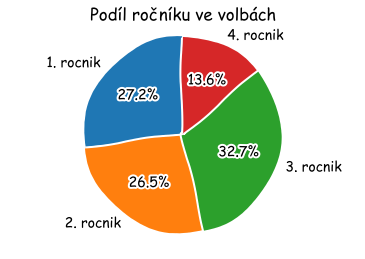

In [140]:
labels_7 = ["{:d}. rocnik".format(r) for r in set(df['rocnik'])]
sizes_7 = [df[df['rocnik'] == r].celkem_volici.sum() for r in set(df['rocnik'])]

bake_pie(sizes_7, labels_7, title='Podíl ročníku ve volbách', save_path='./images/podil_rocniku_ve_volbach.png')

In [141]:
for r, num in [(r, df[df['rocnik'] == r].celkem.sum()) for r in set(df['rocnik'])]:
    print("Rocnik: {:d}. ma {:d} studentu.".format(r, num))

Rocnik: 1. ma 156 studentu.
Rocnik: 2. ma 155 studentu.
Rocnik: 3. ma 146 studentu.
Rocnik: 4. ma 119 studentu.


# Election results

In [142]:
def sort_dict(d):
    sorted_keys = sorted(d, key=d.get, reverse=True)
    sorted_list = np.array([(k, d[k]) for k in sorted_keys])
    return pd.DataFrame({'name': sorted_list[:, 0], 'votes': sorted_list[:, 1]})

def plot_results(results, title="", ylabel="", save_path=""):
    fig, ax = plt.subplots(figsize=(12, 5))
    plt.tight_layout()
    
    results = sort_dict(results)
    
    x_pos = np.arange(len(results))
    ax.bar(x_pos, results['votes'])

    ax.set_xticks(x_pos)
    ax.set_xticklabels(results['name'])

    if title:
        ax.set_title(title)
    if ylabel:
        ax.set_ylabel(ylabel)

    if save_path:
        plt.savefig(save_path, dpi=350)

    plt.show()

In [143]:
names =  ["Drahoš", "Fisher","Hannig", "Hilšer", "Horáček", "Hynek", "Kulhánek", "Topolánek", "Zeman"]
votes = [128, 22, 7, 30, 28, 4, 7, 13, 33]

results = {}
for i, name in enumerate(names):
    results[name] = votes[i]

print("Results:", results)

Results: {'Drahoš': 128, 'Zeman': 33, 'Hilšer': 30, 'Horáček': 28, 'Topolánek': 13, 'Hynek': 4, 'Fisher': 22, 'Kulhánek': 7, 'Hannig': 7}


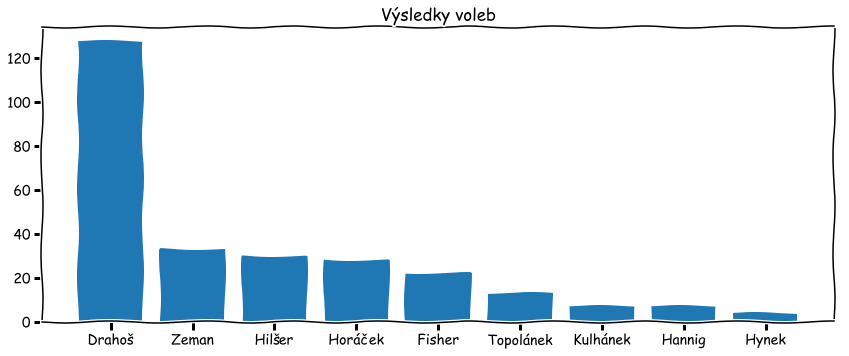

In [144]:
plot_results(results, title="Výsledky voleb", save_path='./images/vysledky_volev.png')